# <span style="color:blue">Cowpea - MNPs Analysis</span>

#### Original Data Extracted from VCF File

In [1]:
from VCFtoTable import *
from GTtable import *
from GTplots import *
from GTplot import *
from BarPlots import *
from CTbarPlots import *
from variant_hist import*
from stats import *
from FilterVCF import *
from GTfilter import*

In [2]:
vcf_cowpea = '/home/anibal/genome_files/freebayes~bwa~GCF_004118075.1_ASM411807v1~all_samples~filtered-default.vcf'

In [3]:
samples_all, vcf_df, chrom_len = VCFtoTable(vcf_cowpea)

In [4]:
samples_all

array(['CBC1_P1', 'CBC5_A1'], dtype=object)

In [5]:
progenitor = 'CBC1_P1'
mutant = 'CBC5_A1'
samples = [progenitor, mutant]
samples

['CBC1_P1', 'CBC5_A1']

In [6]:
vcf_df

,CHROM,POS,REF,ALT,QUAL,DP,CBC1_P1_DP,CBC5_A1_DP,CBC1_P1_GT,CBC5_A1_GT,CBC1_P1_AD,CBC5_A1_AD,AN,TYPE
0,NC_018051.1,11786,T,C,492.441010,22,9,13,0/1,1/1,1/8,0/13,4,snp
1,NC_018051.1,11801,TCTTCCT,CCTACCC,319.031006,26,10,16,0/1,0/1,4/6,3/13,4,complex
2,NC_018051.1,11813,AGCC,GGCT,305.860992,28,10,18,0/1,0/1,2/6,4/13,4,complex
3,NC_018051.1,11825,GGTAGGTAAT,AGTGGGGAAC,315.924988,28,9,19,0/1,0/1,1/6,6/13,4,complex
4,NC_018051.1,18327,G,A,580.976990,25,15,10,1/1,0/1,0/15,2/8,4,snp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968687,NC_040289.1,41659114,T,C,52.265900,30,17,13,0/1,0/1,11/6,11/2,4,snp
1968688,NC_040289.1,41659137,G,C,35.938702,41,24,17,0/1,0/1,18/6,15/2,4,snp
1968689,NC_040289.1,41667130,GTTTCA,GTTCA,340.695007,15,10,5,1/1,1/1,0/8,0/4,4,del
1968690,NC_040289.1,41667148,T,C,158.554993,14,10,4,0/1,0/1,5/5,1/3,4,snp


In [7]:
chrom_len

,LEN
CHROM,
NC_040279.1,42129361
NC_040280.1,33908088
NC_040281.1,65292630
NC_040282.1,42731077
NC_040283.1,48746289
NC_040284.1,34463471
NC_040285.1,40876636
NC_040286.1,38363498
NC_040287.1,43933251


## <span style="color:blue"> PART 0: Raw </span>

#### Contingency Table - RAW - All Chromosomes - (No 0/0, 0/1, 1/1 Filtered)

In [8]:
contingency_table_0 = contingency_table(samples, vcf_df, 'all')


Contingency Table - Chromosome all

                 CBC5_A1_GT                       
                        0/0     0/1     1/1  other
CBC1_P1_GT 0/0            0   52496  132507  45048
           0/1       287090  273476  178974  45048
           1/1       211458   19728  767915  45048
           other      45048   45048   45048  45048


#### GT Plot - RAW - All Chromosomes - (No 0/0, 1/1, 'Other' GTs Filtered)

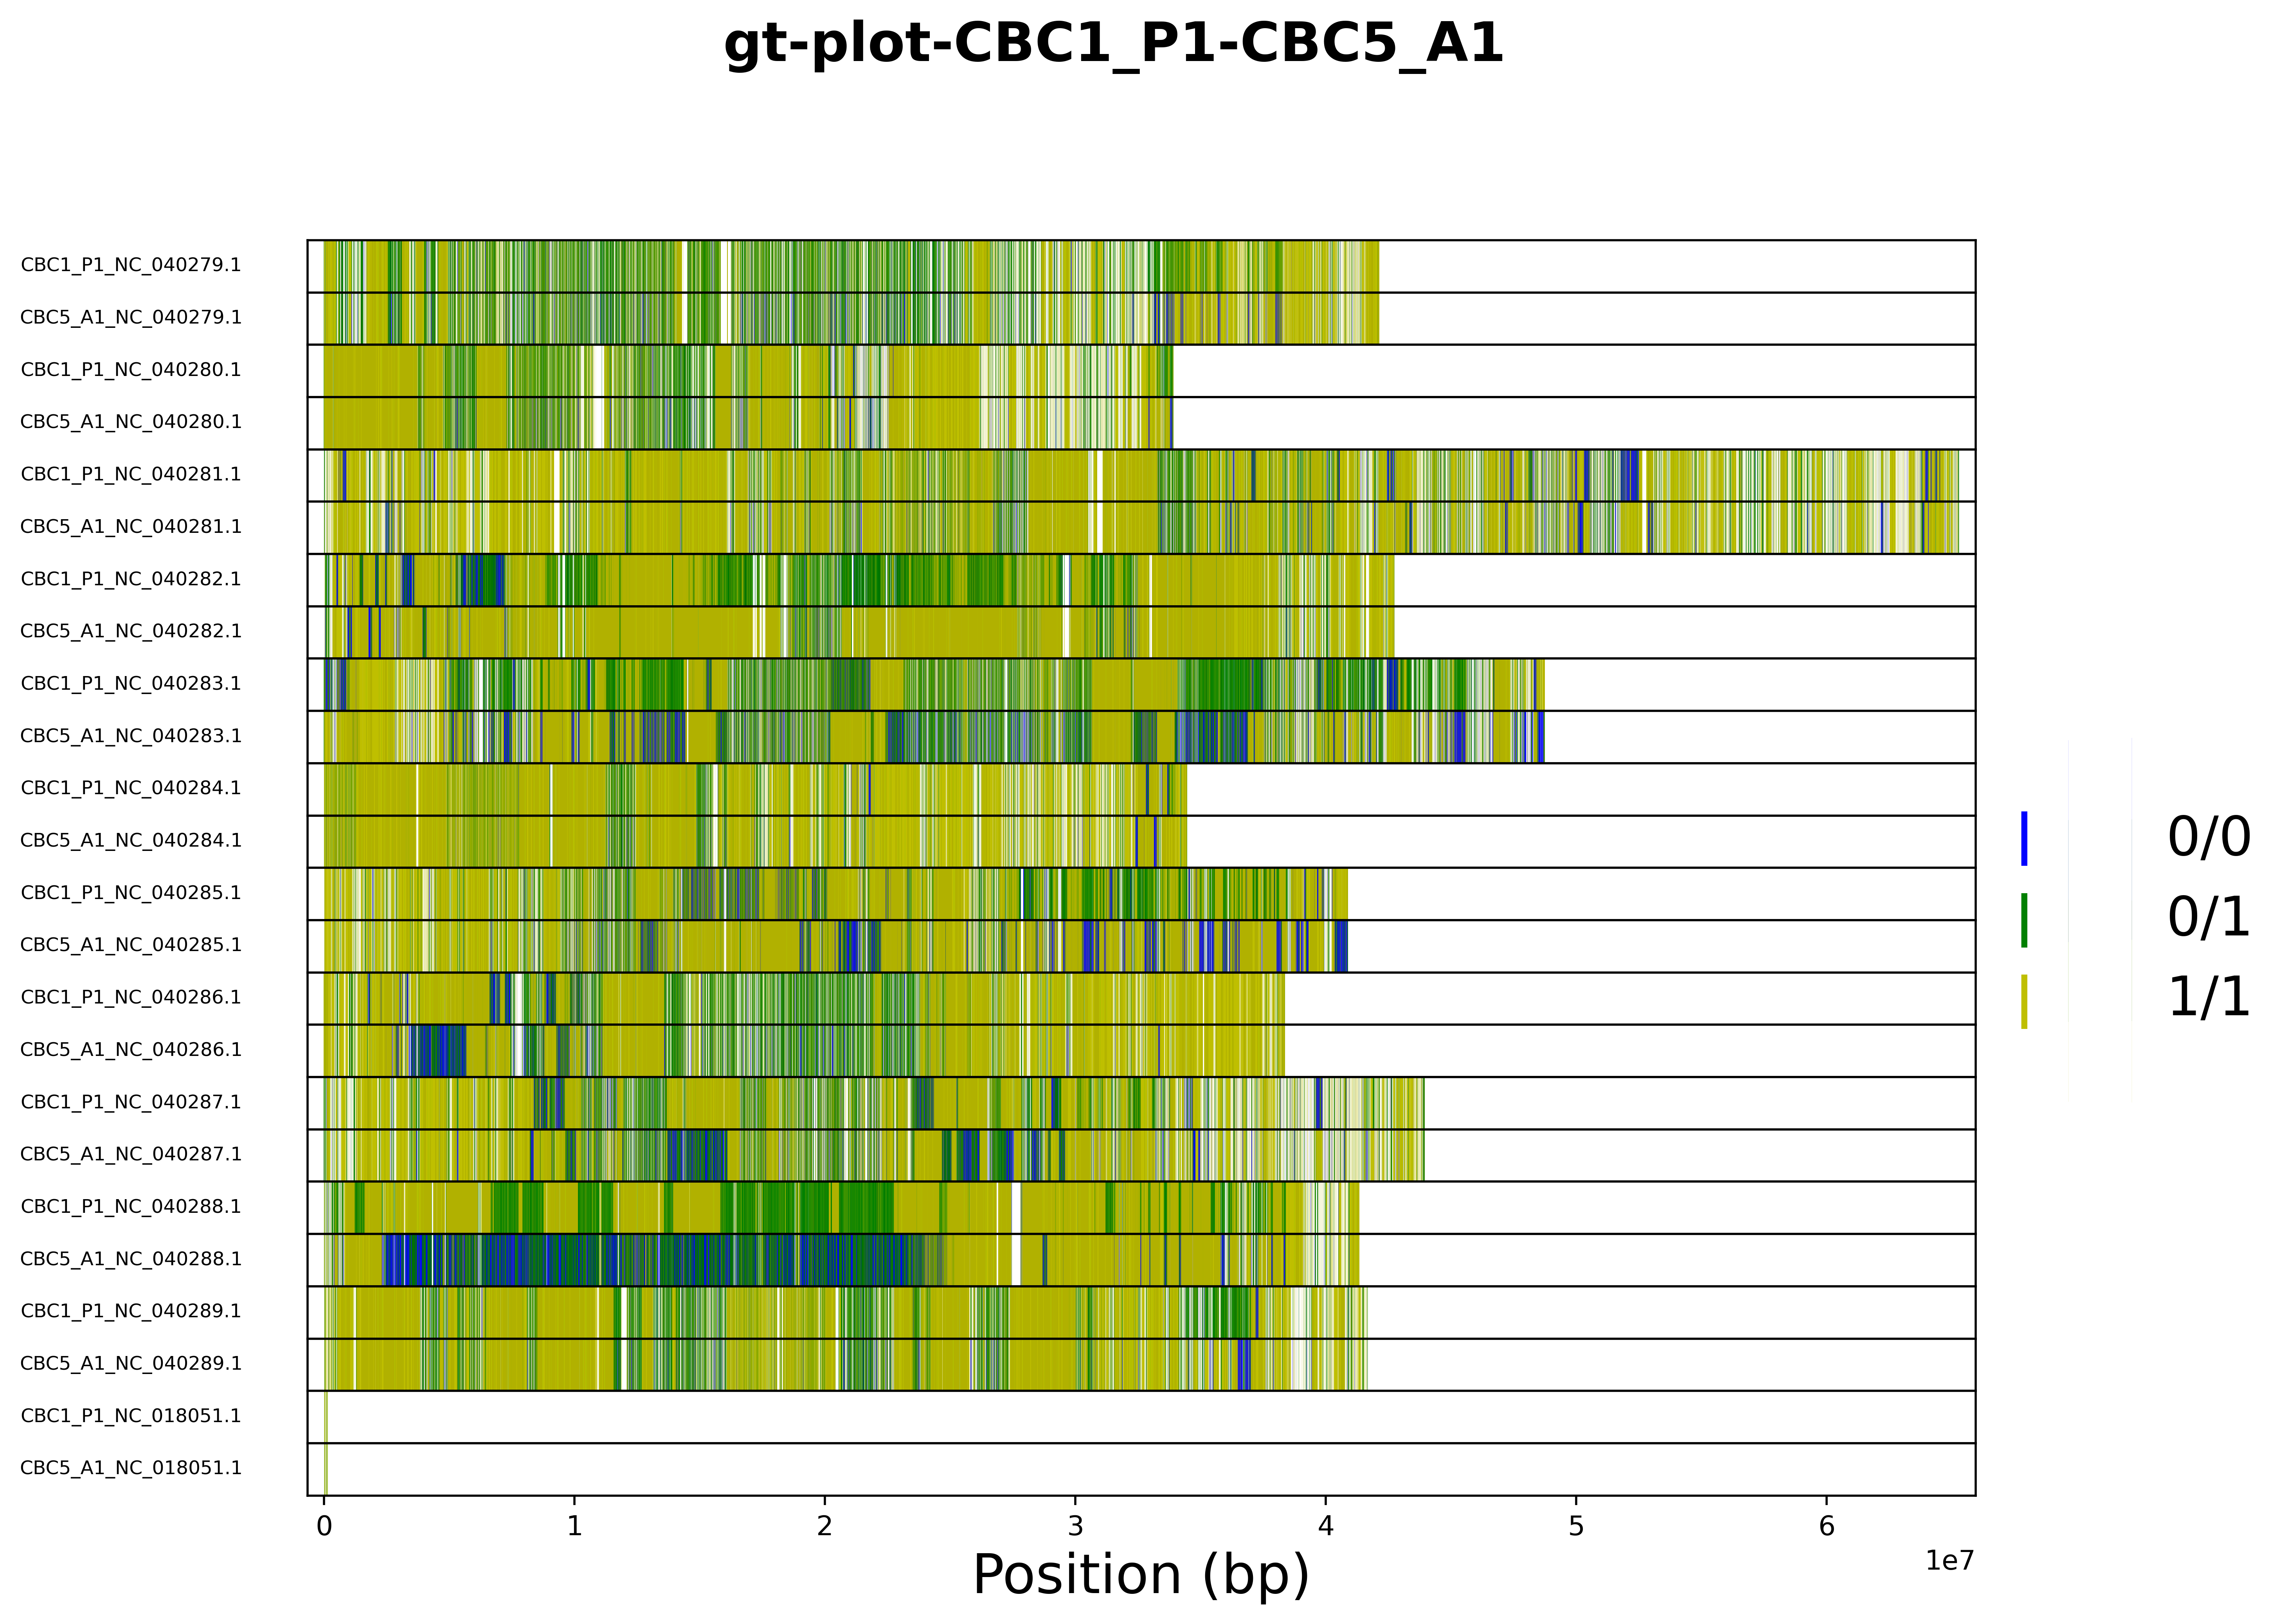

In [9]:
plt.close('all')
GTplot(samples, vcf_df, chrom_len)

#### Histograms - `DP`, `QUAL`, `TYPE` and `GT` Attributes - All Chromosomes - Unfiltered

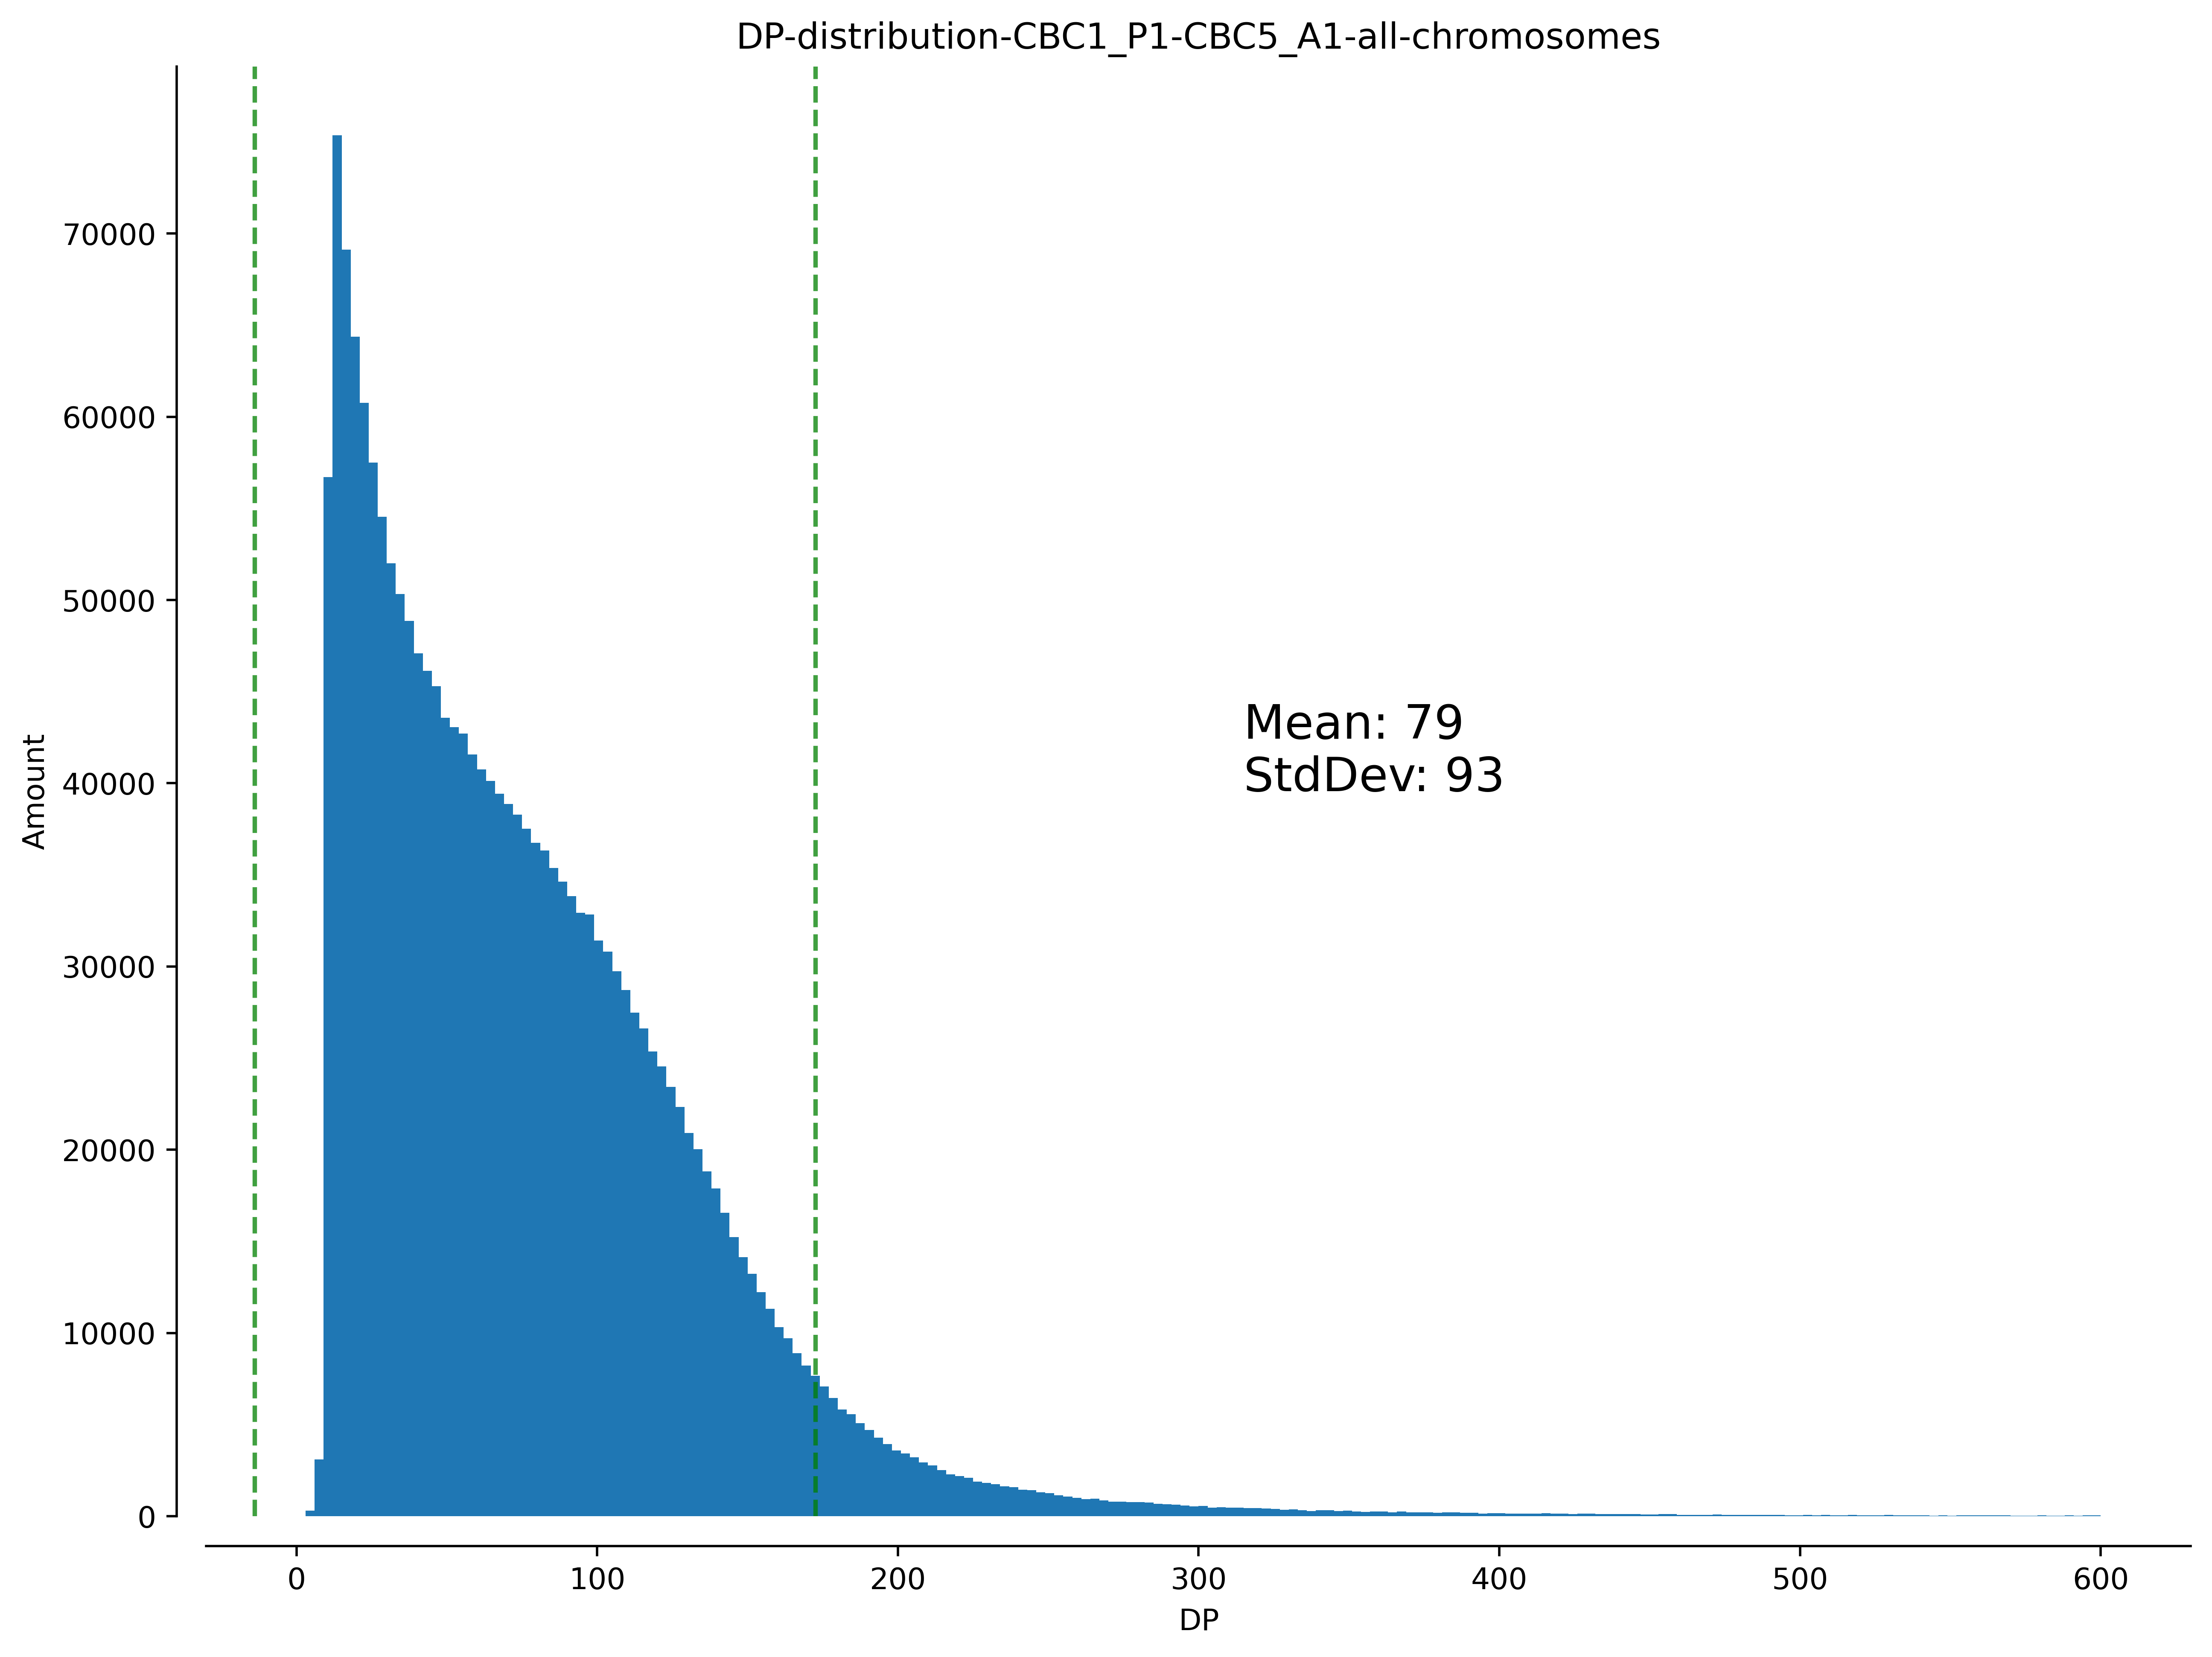

In [10]:
plot_variant_hist(samples, vcf_df, 'all', 'DP', bins=200, MSTD=True, xmax=600)

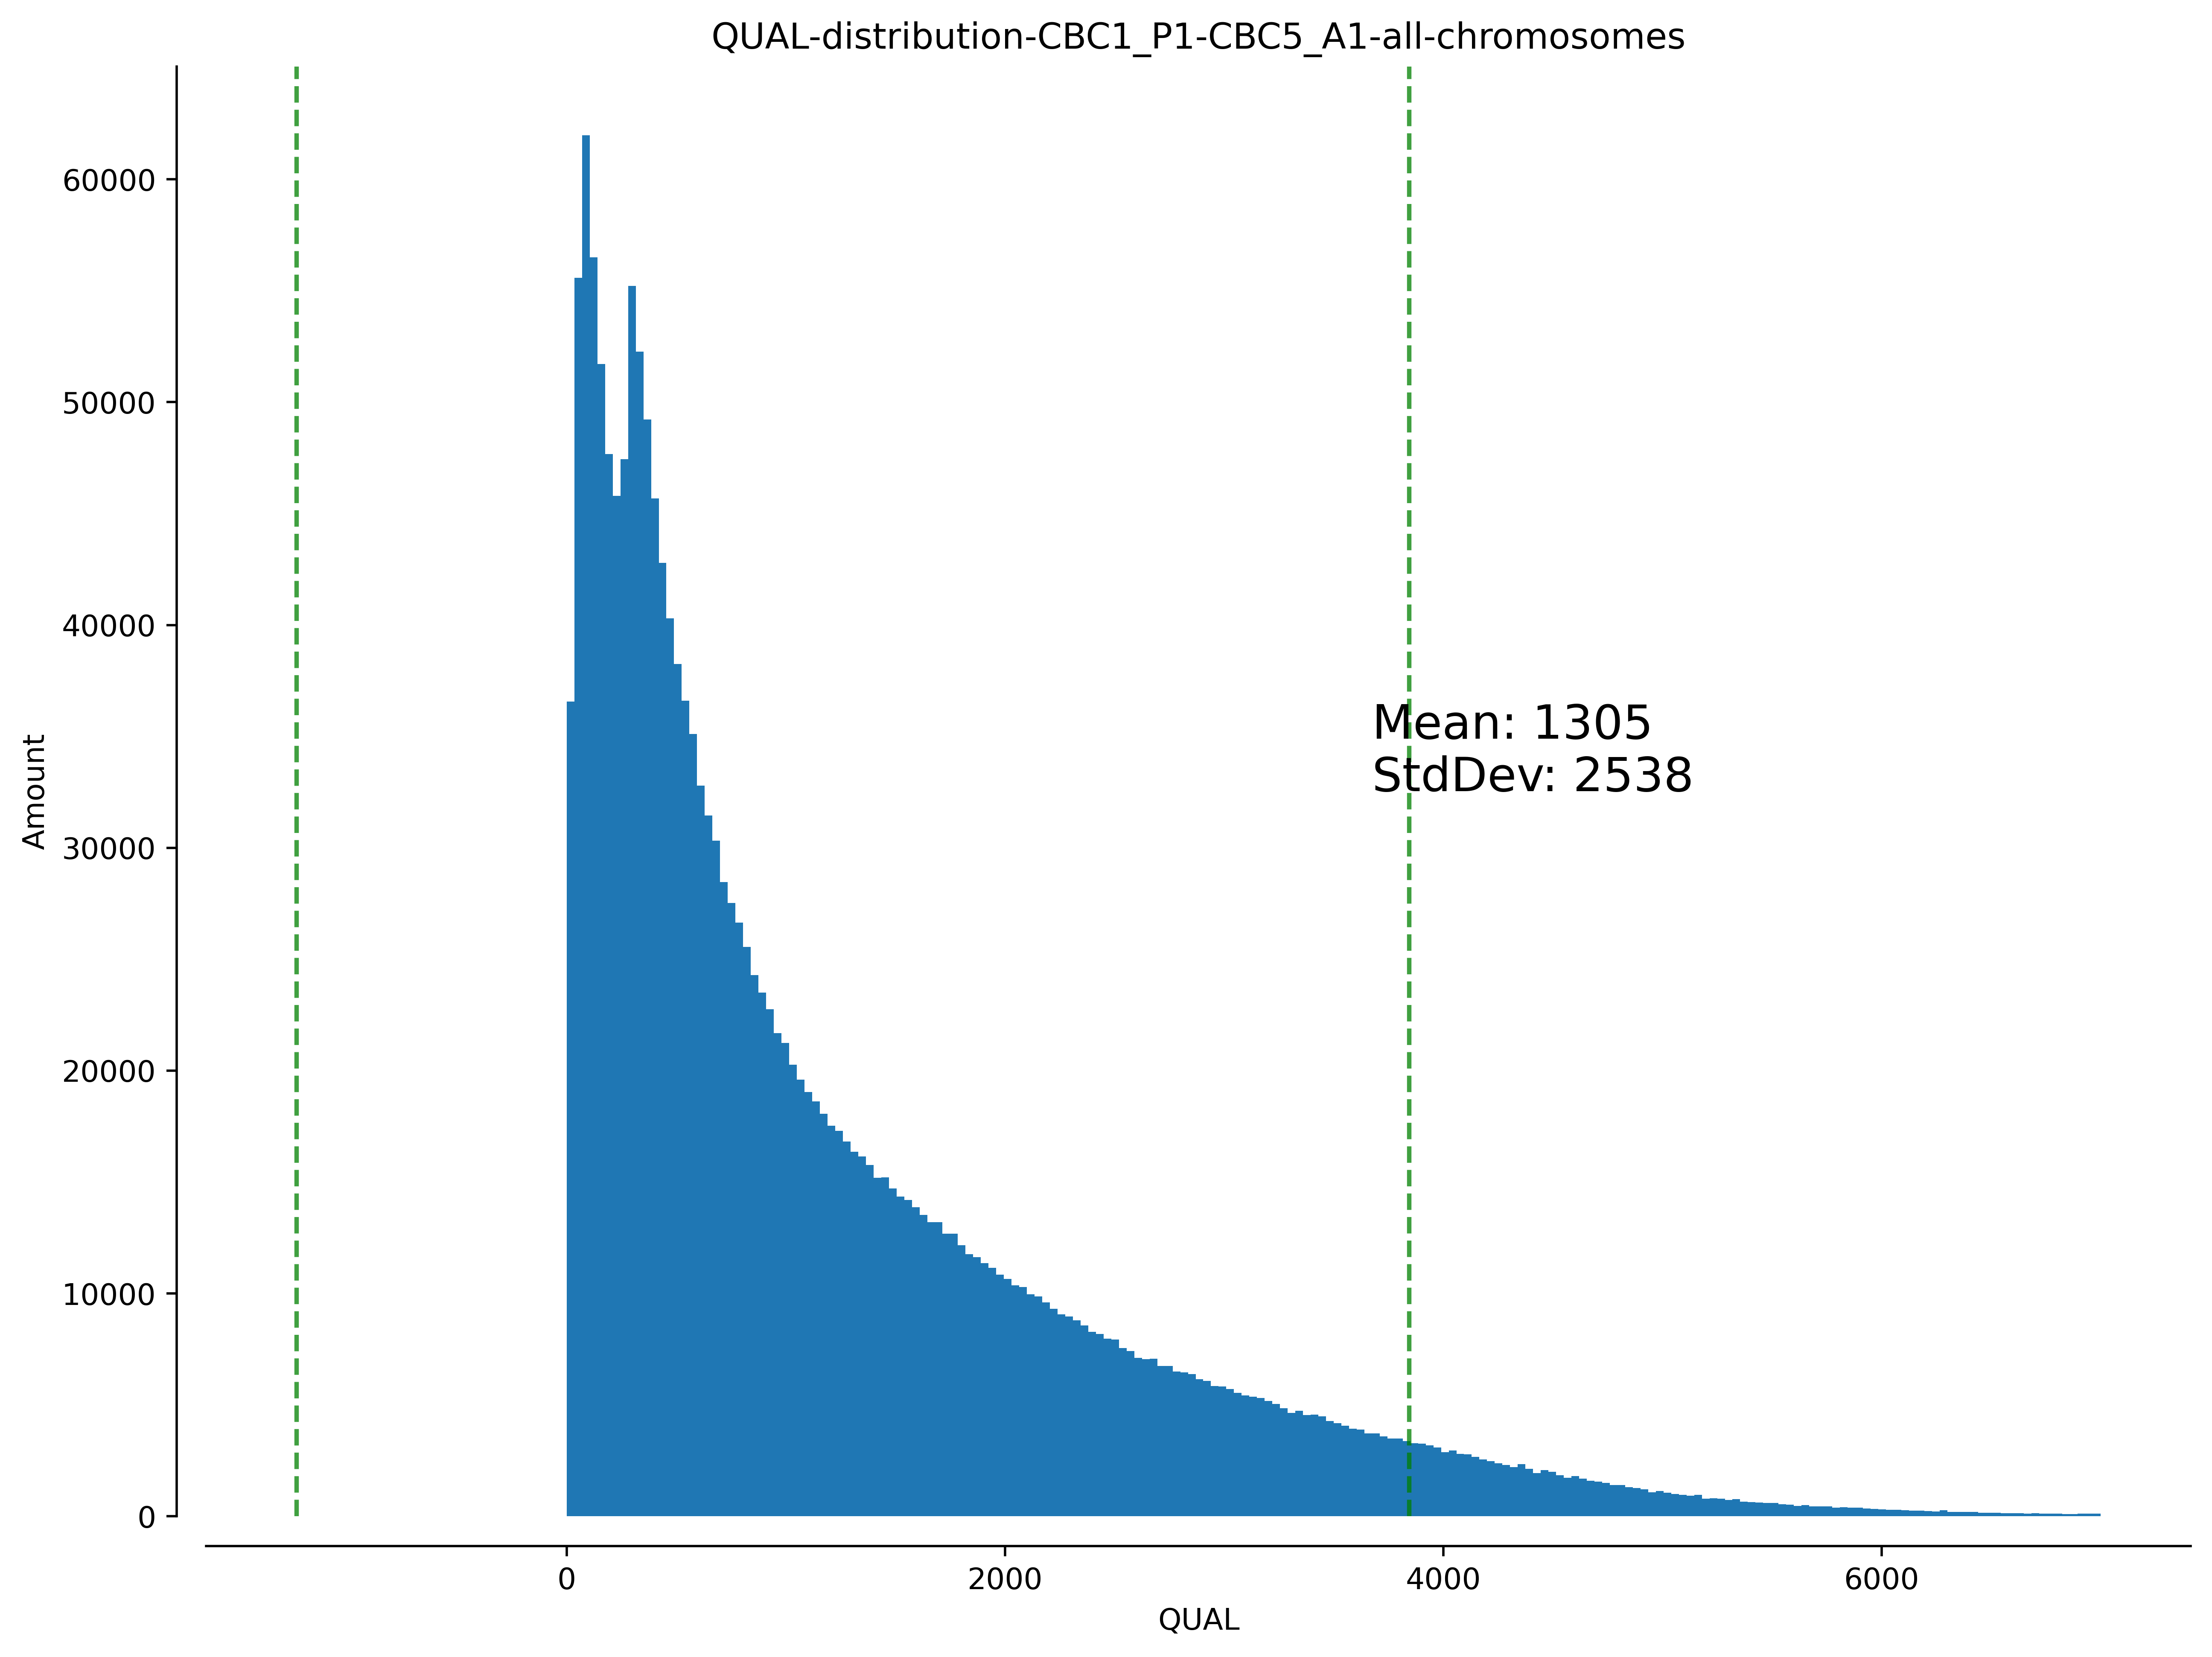

In [11]:
plot_variant_hist(samples, vcf_df, 'all', 'QUAL', bins=200,  MSTD=True, xmax=7000)

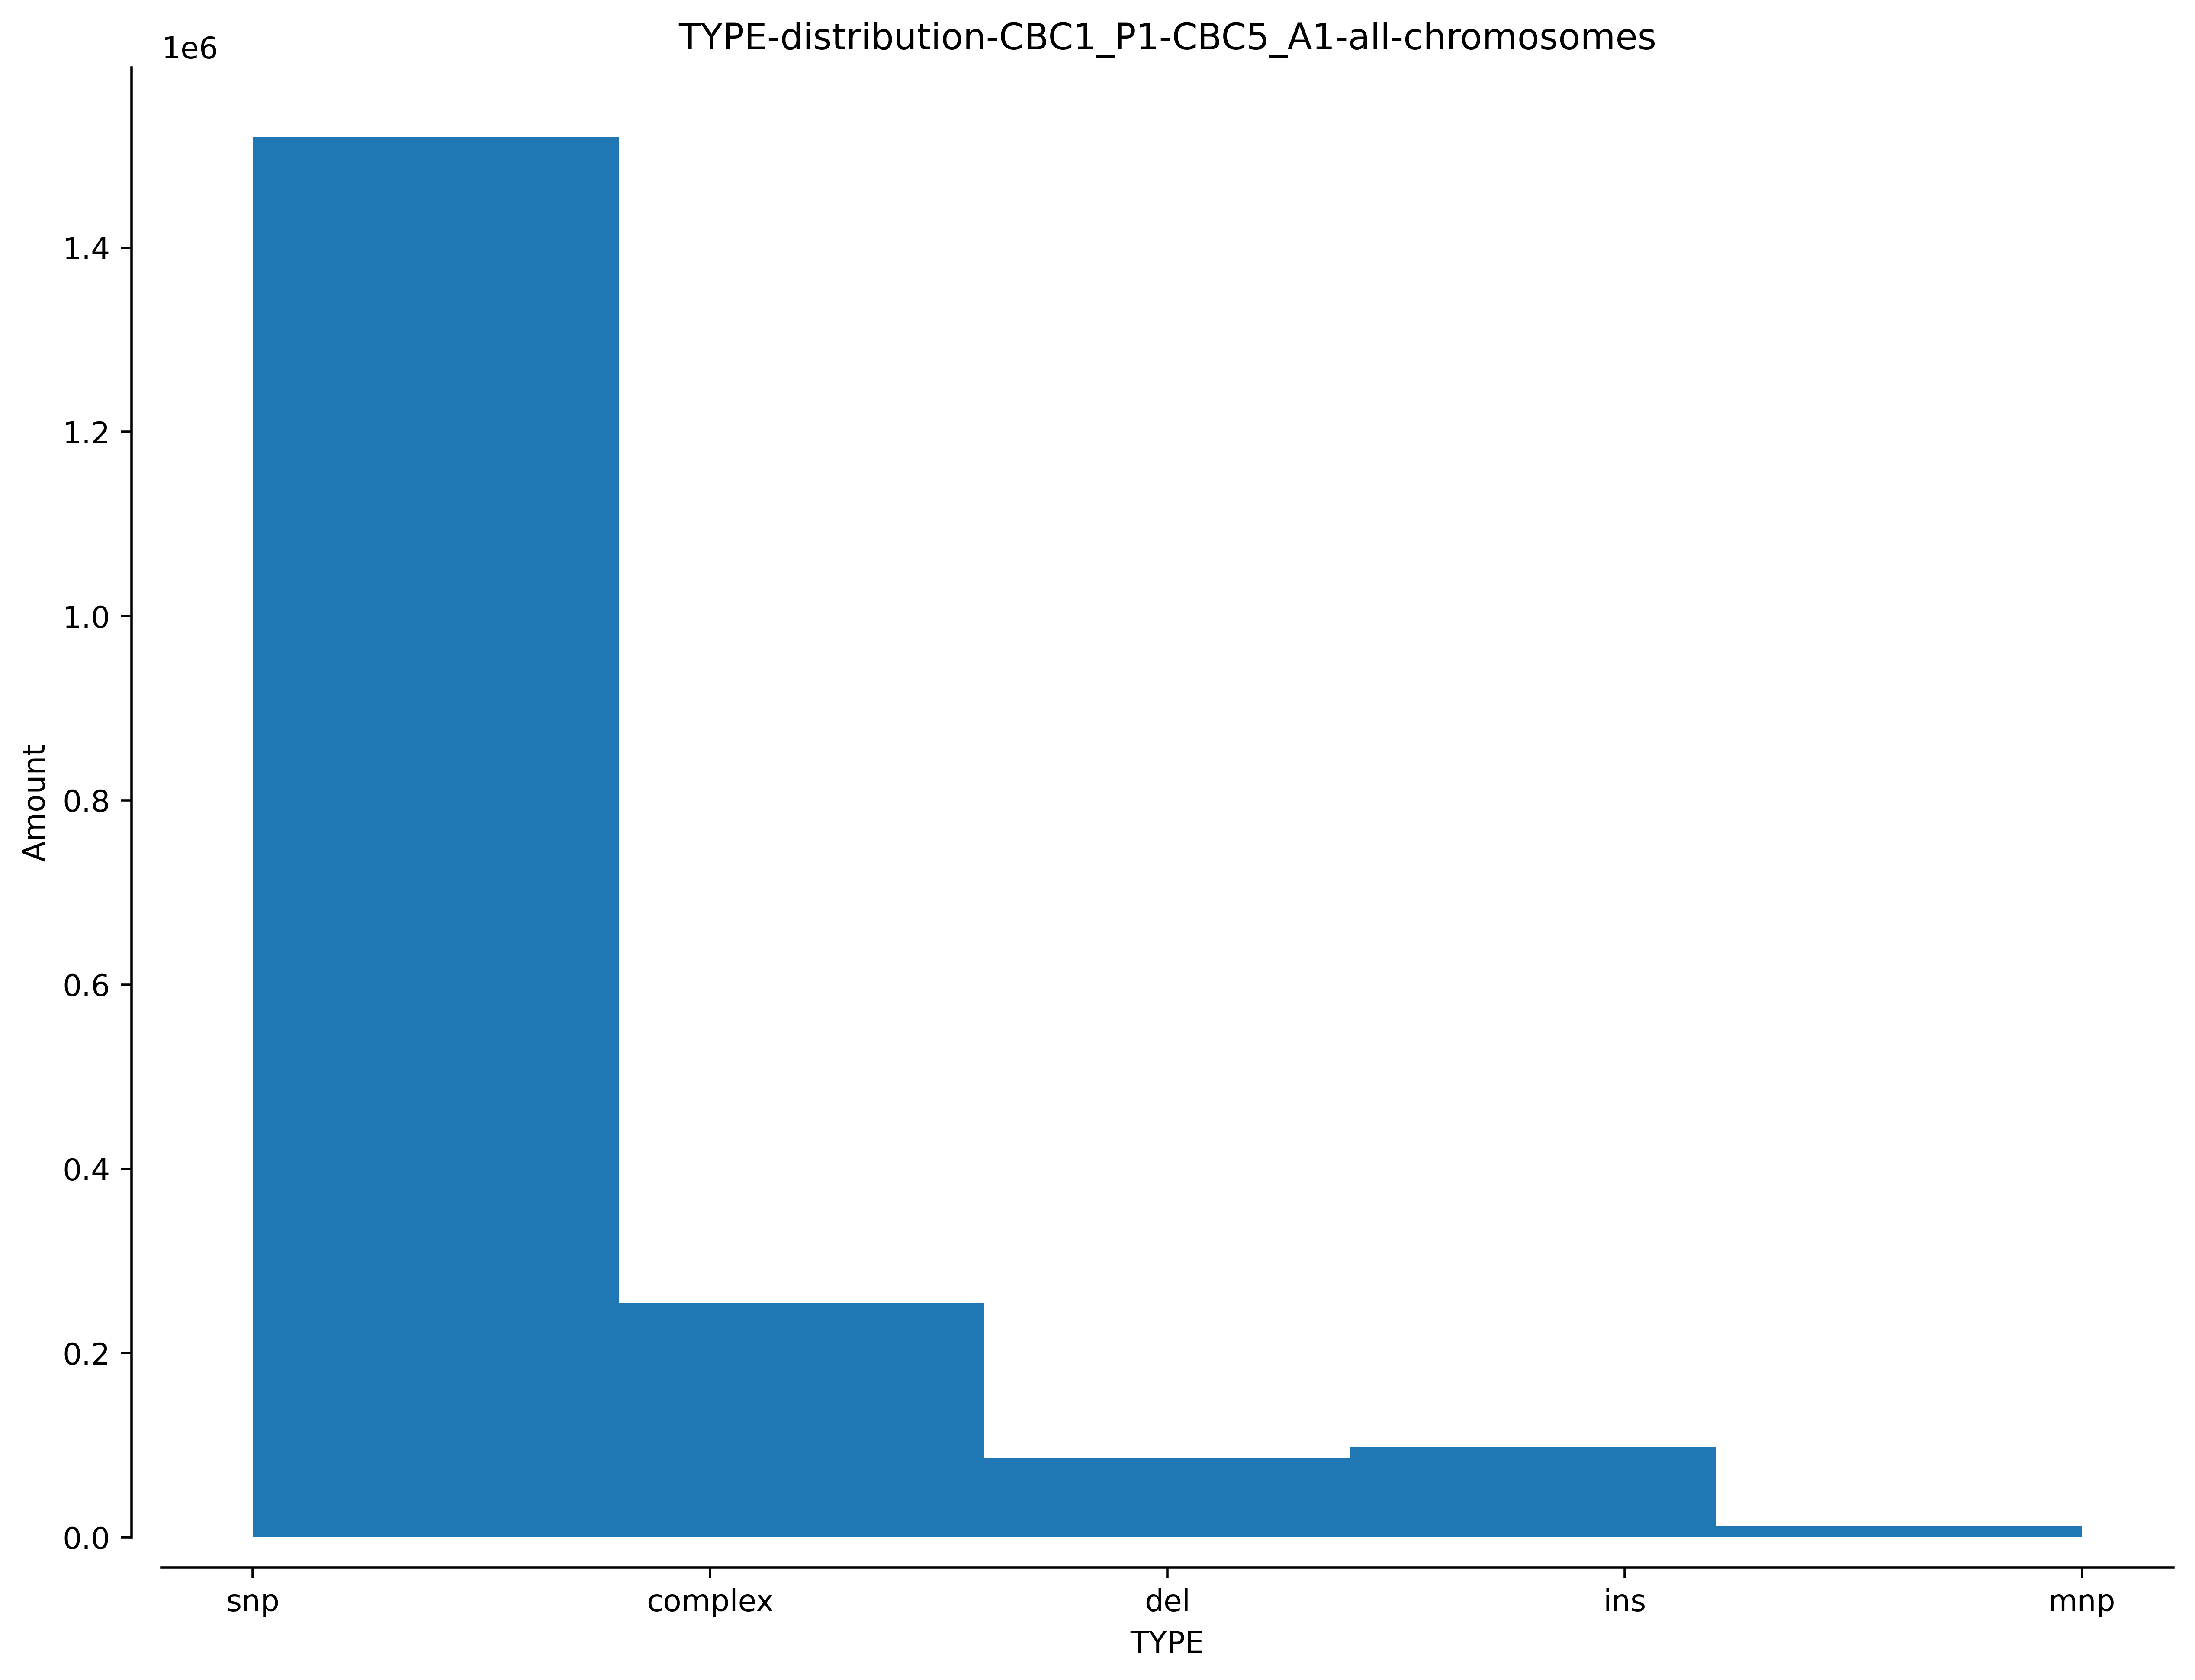

In [12]:
plot_variant_hist(samples, vcf_df, 'all', 'TYPE', bins=5)

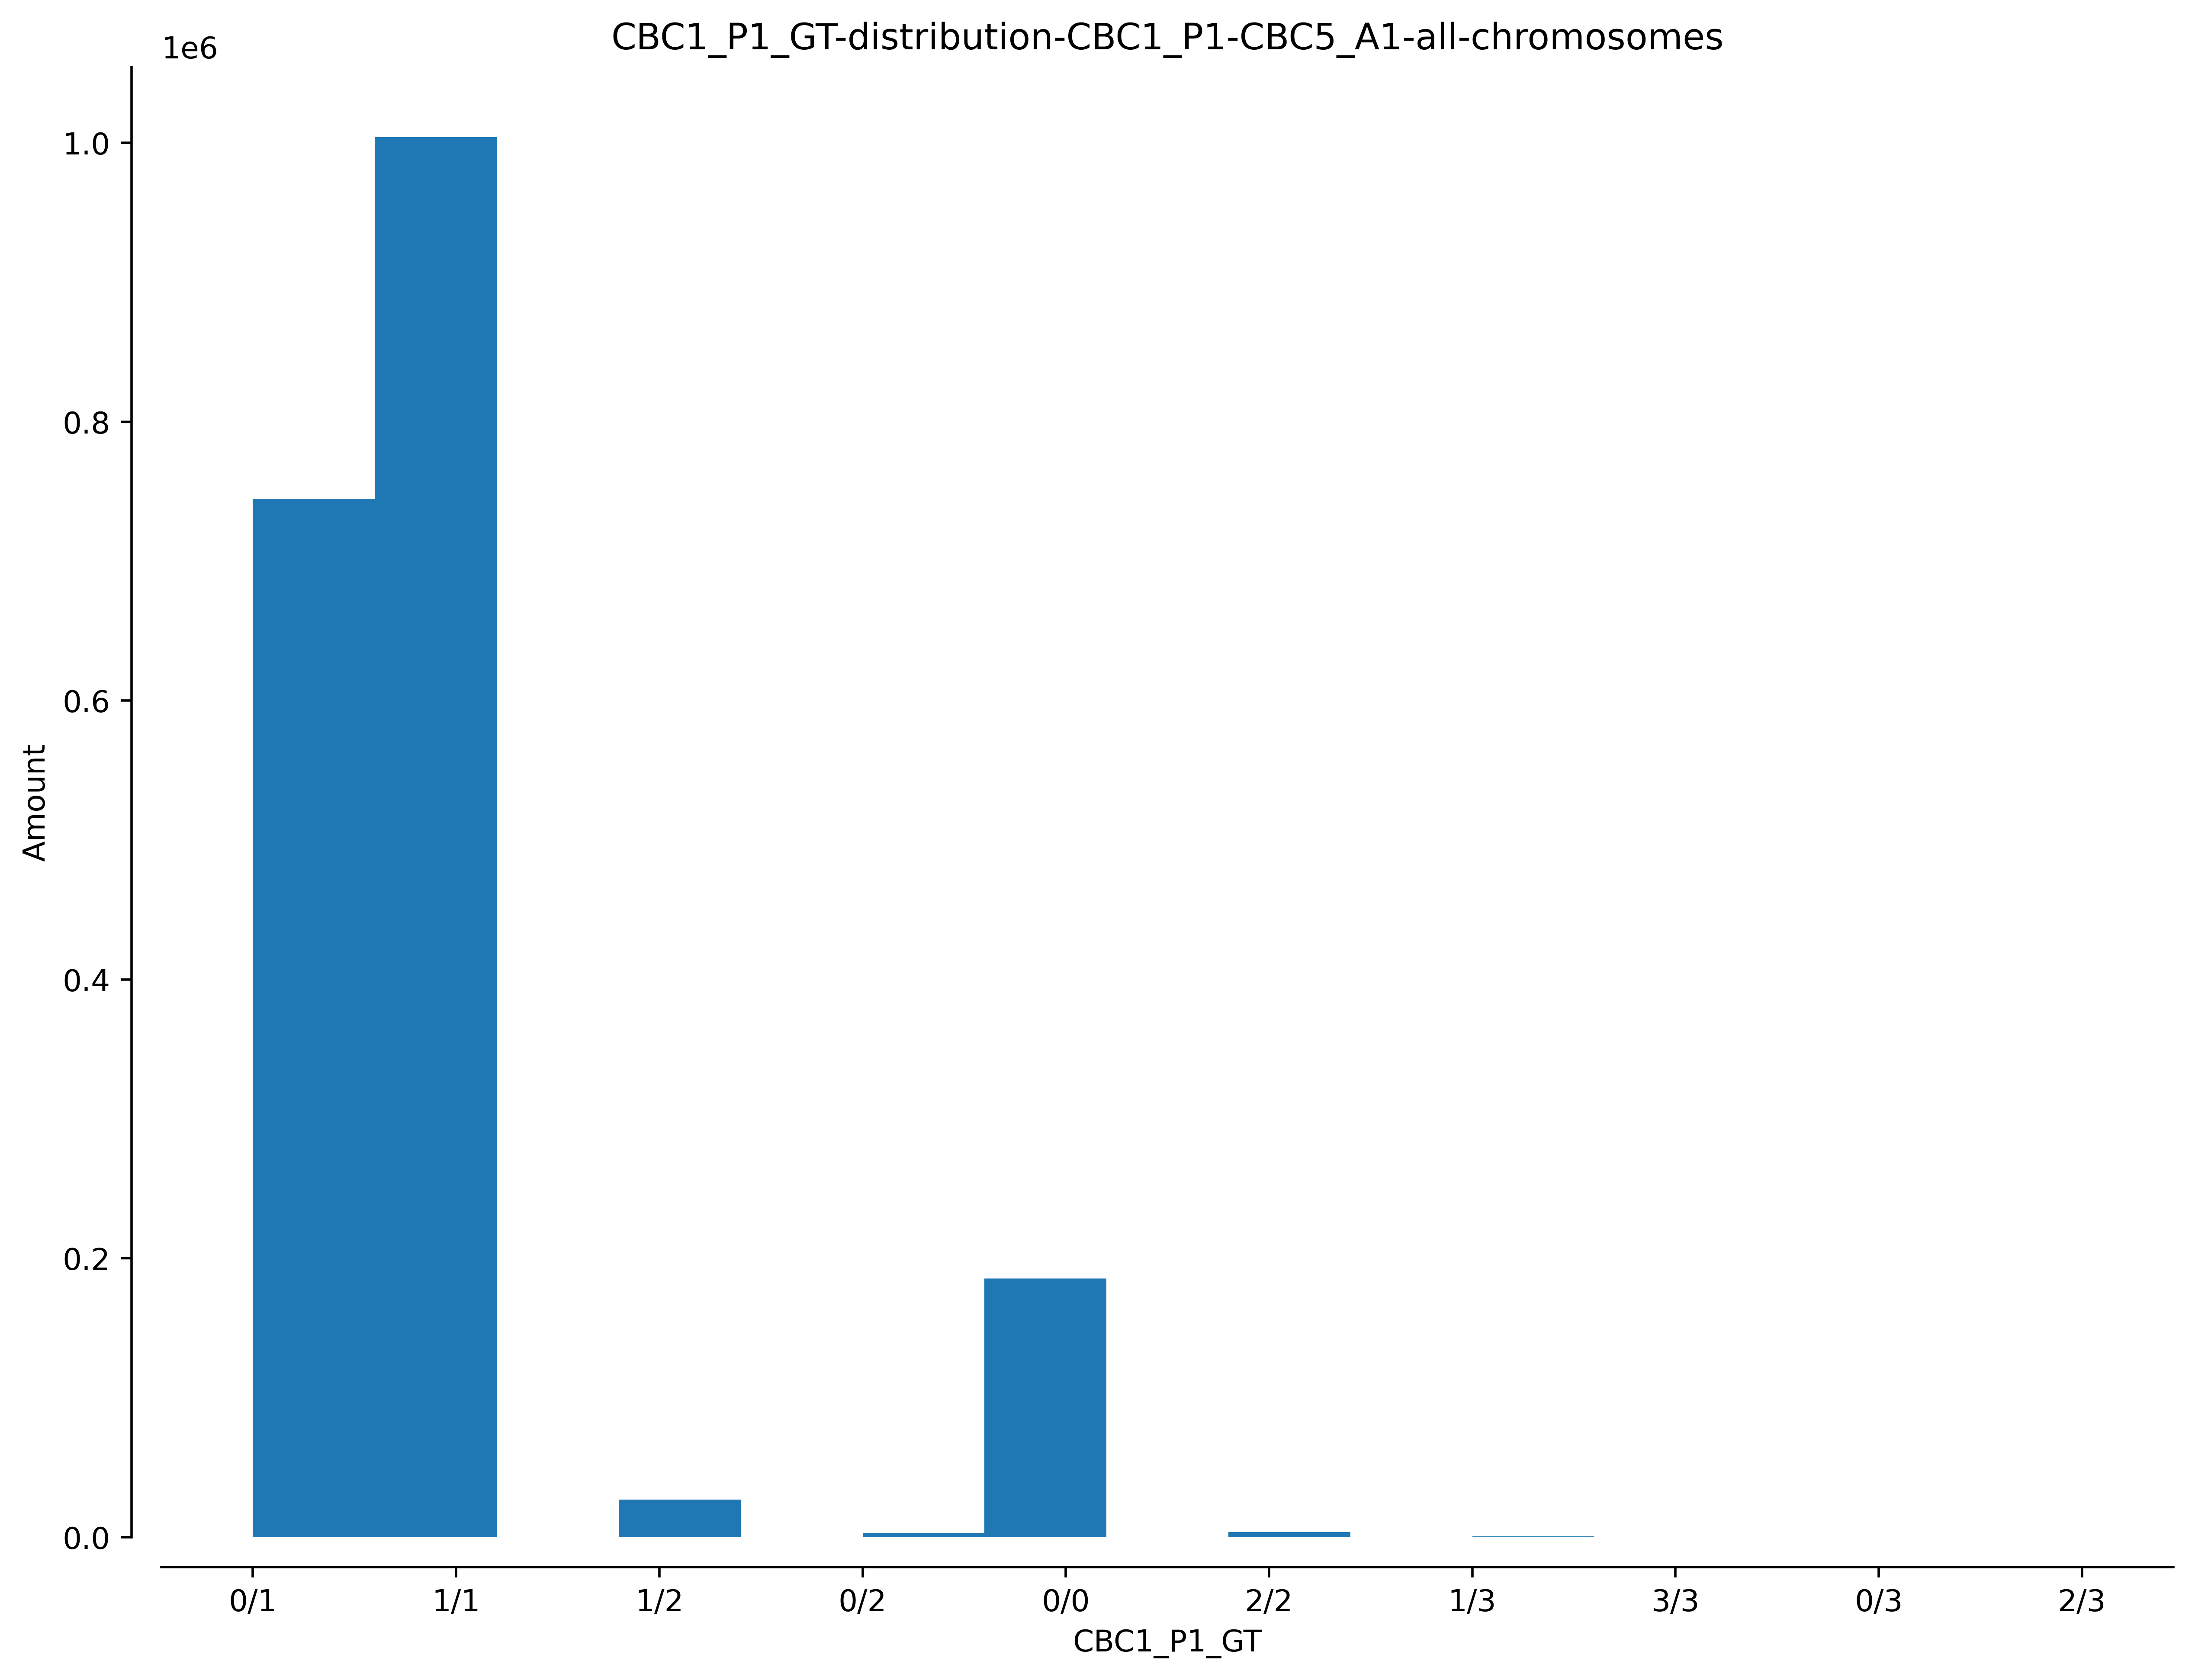

In [14]:
plot_variant_hist(samples, vcf_df, 'all', 'CBC1_P1_GT', bins=15)

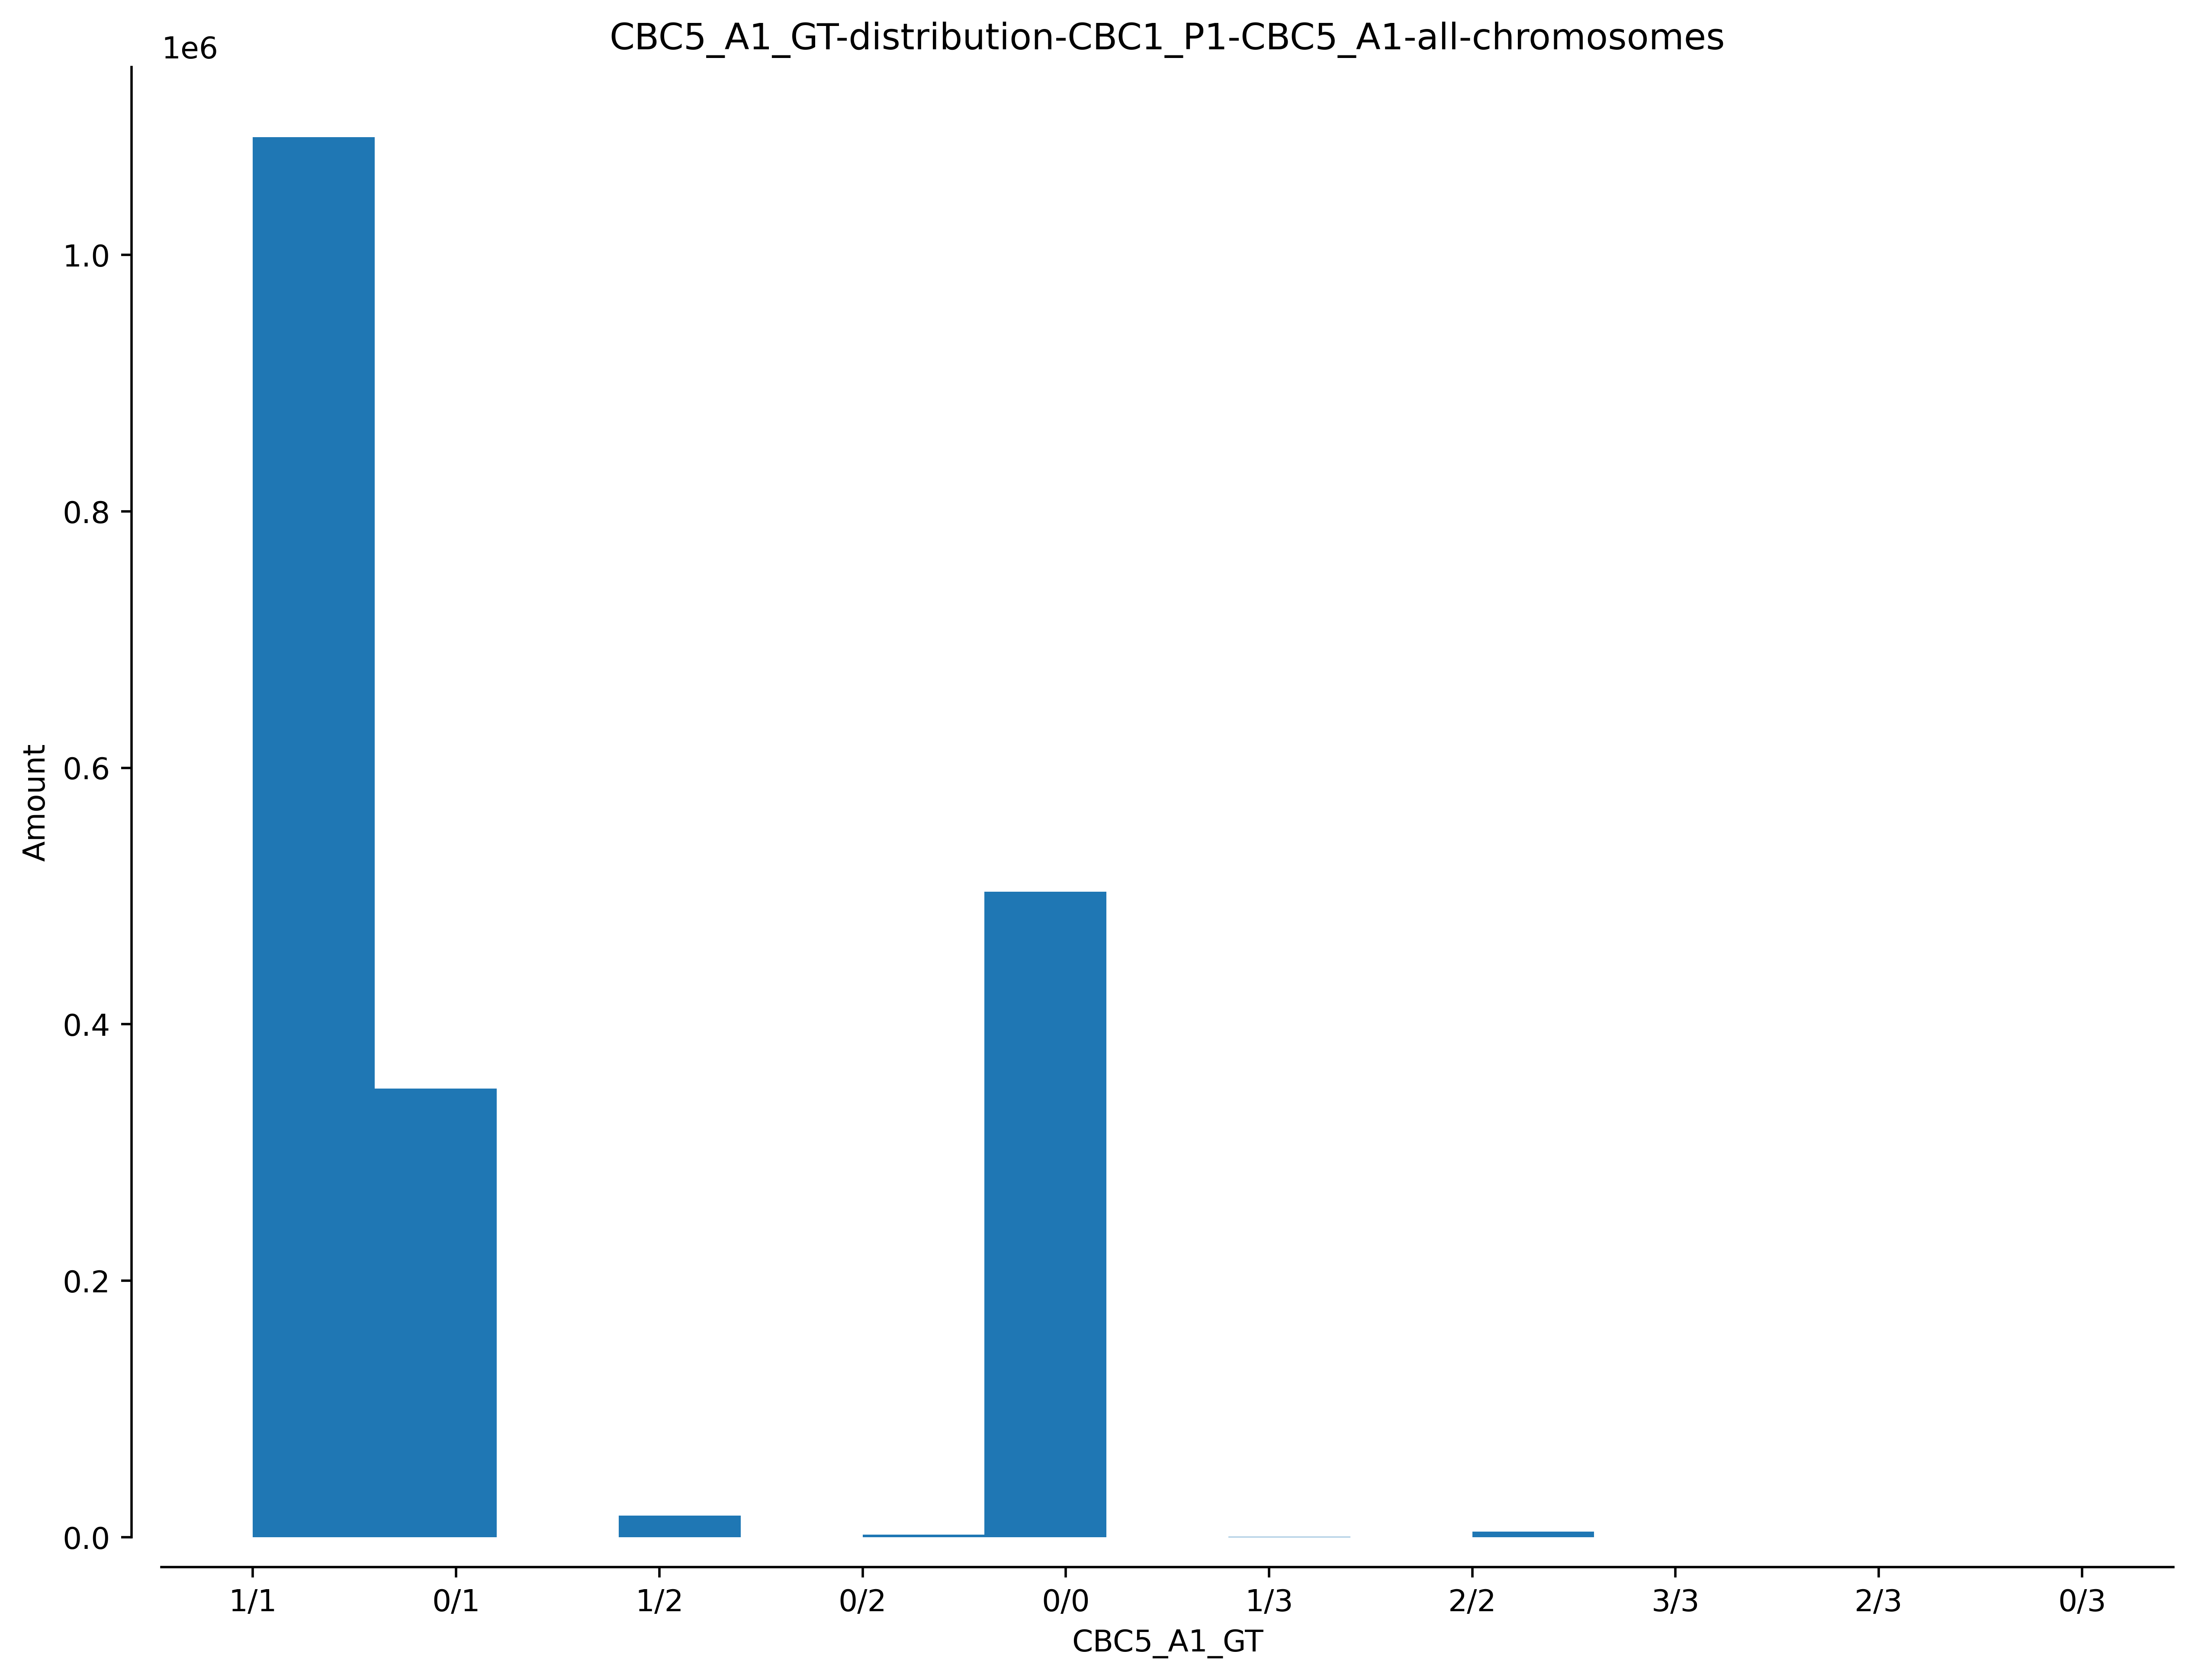

In [15]:
plot_variant_hist(samples, vcf_df, 'all', 'CBC5_A1_GT', bins=15)

#### Stacked Bar Plots - RAW

In [16]:
ct_guide()

NameError: name 'ct_guide' is not defined

In [ ]:
plt.close('all')
window_size = 1000000
CTbarPlots(samples, vcf_df, chrom_len, window_size)

## <span style="color:blue"> PART 1: Filter Out Mitochondria and Chloroplast Chromosomes </span>

#### Drop Mitochrondria and Chloroplast Chromosomes from `vcf_df` and `chrom_len`

In [ ]:
drop_mito_chloro = "CHROM != NC_018051.1"
vcf_df_00 = filter_vcf(vcf_df, drop_mito_chloro)
vcf_df_00

In [ ]:
mito_chloro = ['NC_018051.1']
chrom_len_00 = chrom_len.drop(mito_chloro)
chrom_len_00

#### Create Mitochrondria and Chloroplast Variants and Chomosome Length Dataframes

In [ ]:
drop_chrom = "CHROM!=NC_040279.1, CHROM!=NC_040280.1, CHROM!=NC_040281.1, CHROM!=NC_040282.1, CHROM!=NC_040283.1, CHROM!=NC_040284.1, CHROM!=NC_040285.1, CHROM!=NC_040286.1, CHROM!=NC_040287.1, CHROM!=NC_040288.1, CHROM!=NC_040289.1"
vcf_df_mito_chloro = filter_vcf(vcf_df, drop_chrom)
vcf_df_mito_chloro

In [ ]:
mito_chloro_len = chrom_len.loc[mito_chloro]
mito_chloro_len

#### Contingency Table - No Mitochondria/Chloroplast

In [ ]:
contingency_table_1 = contingency_table(samples, vcf_df_00, 'all')

#### GT Plot - No Mitochondria/Chloroplast

In [ ]:
# plt.close('all')
# GTplot(samples, vcf_df_00, chrom_len_00)

#### Histograms - `DP`, `QUAL`, `TYPE` and `GT` Attributes - No Mitochondria/Chloroplast

In [ ]:
plot_variant_hist(samples, vcf_df_00, 'all', 'DP', bins=200, MSTD=True, xmax=600)

In [ ]:
plot_variant_hist(samples, vcf_df_00, 'all', 'QUAL', bins=200,  MSTD=True, xmax=7000)

In [ ]:
plot_variant_hist(samples, vcf_df_00, 'all', 'TYPE', bins=5)

In [ ]:
plot_variant_hist(samples, vcf_df_00, 'all', '%s_GT' % progenitor, bins=15)

In [ ]:
plot_variant_hist(samples, vcf_df_00, 'all', '%s_GT' % mutant, bins=15)

## <span style="color:blue">PART 2: Cutting Off by Mean±2StdDev Histograms of `DP` Attribute</span>

In [ ]:
cutoff_left = vcf_df_00.DP.mean() - (2 * vcf_df_00.DP.std())
cutoff_right = vcf_df_00.DP.mean() + (2 * vcf_df_00.DP.std())

filter_dp = "DP >= %i, DP <= %i" % (cutoff_left, cutoff_right)
print(filter_dp)

vcf_df_01 = filter_vcf(vcf_df_00, filter_dp)
vcf_df_01

#### Verify DP Histogram Cutoff Off by Mean±StdDev

In [ ]:
plot_variant_hist(samples, vcf_df_01, 'all', 'DP', bins=200, xmax=200)

In [ ]:
plot_variant_hist(samples, vcf_df_01, 'all', 'QUAL', bins=100, MSTD=True)

#### Contingency Table After DP Cutoff by Mean±StdDev

In [ ]:
contingency_table_2 = contingency_table(samples, vcf_df_01, 'all')

#### GT Plot After DP Cutoff by Mean±StdDev

In [ ]:
# plt.close('all')
# GTplot(samples, vcf_df_01, chrom_len_00)

#### Histogram 'GT' Attribute after DP Cutoff

In [ ]:
plot_variant_hist(samples, vcf_df_01, 'all', '%s_GT' % progenitor, bins=15)

In [ ]:
plot_variant_hist(samples, vcf_df_01, 'all', '%s_GT' % mutant, bins=15)

## <span style="color:blue">PART 3: Extract `mnp` from `TYPE` Attribute</span>

#### Extract `mnp`  `TYPE` Attribute

In [ ]:
extract_type = "TYPE != snp, TYPE != complex, TYPE != ins, TYPE != del"
vcf_df_02 = filter_vcf(vcf_df_01, extract_type)
vcf_df_02

#### Examples of `mnp` mutation type

In [ ]:
vcf_df_02[ ['REF', 'ALT'] ].head()

In [ ]:
vcf_df_02[ ['REF', 'ALT'] ].tail()

#### TYPE `mnp` Histogram Verification

In [ ]:
plot_variant_hist(samples, vcf_df_02, 'all', 'TYPE', bins=5)

#### Contingency Table - `mnp` TYPE only

In [ ]:
contingency_table_3 = contingency_table(samples, vcf_df_02, 'all')

#### GT Plot - `mnp` TYPE only

In [ ]:
# plt.close('all')
# GTplot(samples, vcf_df_02, chrom_len_00)

#### Histograms - DP, QUAL, and GT Attributes after TYPE Filtering

In [ ]:
plot_variant_hist(samples, vcf_df_02, 'all', 'DP', bins=200, MSTD=True, xmax=600)

In [ ]:
plot_variant_hist(samples, vcf_df_02, 'all', 'QUAL', bins=200,  MSTD=True, xmax=7000)

In [ ]:
plot_variant_hist(samples, vcf_df_02, 'all', '%s_GT' % progenitor, bins=15)

In [ ]:
plot_variant_hist(samples, vcf_df_02, 'all', '%s_GT' % mutant, bins=15)

## <span style="color:blue"> PART 4: Cutting Off by Mean±StdDev Histograms of `QUAL` Attribute</span>

In [ ]:
# cutoff_left = vcf_df_02.QUAL.mean() - vcf_df_02.QUAL.std()
# cutoff_right = vcf_df_02.QUAL.mean() + vcf_df_02.QUAL.std()

# filter_qual = "QUAL >= %i, QUAL <= %i" % (cutoff_left, cutoff_right)
# print(filter_qual)

# vcf_df_03 = filter_vcf(vcf_df_02, filter_qual)
# vcf_df_03

#### Verify `DP` and `QUAL` Histograms after `QUAL` Cutoff Off by Mean±StdDev

In [ ]:
# plot_variant_hist(samples, vcf_df_03, 'all', 'DP', bins=200, xmax=200)

In [ ]:
# plot_variant_hist(samples, vcf_df_03, 'all', 'QUAL', bins=100, xmax=3500)

#### Contingency Table After QUAL Cutoff by Mean±StdDev

In [ ]:
# contingency_table_4 = contingency_table(samples, vcf_df_03, 'all')
# contingency_table_4

#### GT Plot After QUAL Cutoff by Mean±StdDev

In [ ]:
# plt.close('all')
# GTplot(samples, vcf_df_03, chrom_len_00)

#### Histograms after QUAL Cutoff by Mean±StdDev

In [ ]:
# plot_variant_hist(samples, vcf_df_03, 'all', 'PAHAT_1_GT', bins=9)

In [ ]:
# plot_variant_hist(samples, vcf_df_03, 'all', 'GHP-2-2_GT', bins=9)

## <span style="color:blue"> PART 5: Filtering GTs 0/0, 1/1, 'Other' </span>

#### Filter out where samples GTs are the same (0/0, 1/1) and have 'Other'

In [ ]:
progenitor_gts_filter = "CBC1_P1_GT != ./., CBC1_P1_GT != 0/2, CBC1_P1_GT != 1/2, CBC1_P1_GT != 2/2, CBC1_P1_GT != 0/3, CBC1_P1_GT != 1/3, CBC1_P1_GT != 2/3, CBC1_P1_GT != 3/3"
vcf_df_04 = filter_vcf(vcf_df_02, progenitor_gts_filter)

mutant_gts_filter = "CBC5_A1_GT != ./., CBC5_A1_GT != 0/2, CBC5_A1_GT != 1/2, CBC5_A1_GT != 2/2, CBC5_A1_GT != 0/3, CBC5_A1_GT != 1/3, CBC5_A1_GT != 2/3, CBC5_A1_GT != 3/3"
vcf_df_04 = filter_vcf(vcf_df_04, mutant_gts_filter)

genotypes = ['0/0', '1/1']
for genotype in genotypes:
    vcf_df_04 = filter_similar_gt(samples, vcf_df_04, genotype)

vcf_df_04

#### Contingency Table after GT Filtering

In [ ]:
contingency_table_5 = contingency_table(samples, vcf_df_04, 'all')

#### GT Plot after GT Filtering

In [ ]:
plt.close('all')
GTplot(samples, vcf_df_04, chrom_len_00)

#### Histograms GT after GT Filtering 

In [ ]:
plot_variant_hist(samples, vcf_df_04, 'all', '%s_GT' % progenitor, bins=9)

In [ ]:
plot_variant_hist(samples, vcf_df_04, 'all', '%s_GT' % mutant, bins=9)

## <span style="color:blue"> PART 6: Stacked Bar Plots</span>

In [ ]:
ct_guide()

In [ ]:
plt.close('all')
window_size = 1000000
CTbarPlots(samples, vcf_df_04, chrom_len_00, window_size)

## <span style="color:blue"> PART 7: Bar Plots per Chromosome</span>

In [ ]:
# suppress all the warnings from the inverted tickes of bar plots
import warnings
warnings.filterwarnings('ignore')

plt.close('all')
GTbarPlots(samples, vcf_df_04, chrom_len_00, window_size)

## <span style="color:blue"> PART 8: GT Plots per Chromosome</span>

In [ ]:
plt.close('all')
GTplots(samples, vcf_df_04, chrom_len_00)

## <span style="color:blue"> PART 9: Contingency Table per Chromosome</span>

In [ ]:
import dataframe_image as dfi

for chromosome in chrom_len_00.index:
    chromosome_df = vcf_df_04[ vcf_df_04.CHROM == chromosome ]
    
    # reset chromosome_df indexes for contingency table
    chromosome_df.reset_index(inplace=True, drop=True)
    chromosome_ct = contingency_table(samples, chromosome_df, chromosome)